In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-ibm-runtime
!pip install qiskit-aer

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute, IBMQ, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.tools.jupyter import *

In [4]:
!pip install qiskit-ibm-provider

In [8]:
%run cred.sh

**Uncomment the code below to insert your token**

### Connecting to a real device

In [9]:
from qiskit_ibm_provider import IBMProvider

**Uncomment code below**

In [10]:
### IBMProvider.save_account([IBM TOKEN])

In [11]:
provider = IBMProvider()
lagos_backend = provider.get_backend('ibm_lagos')

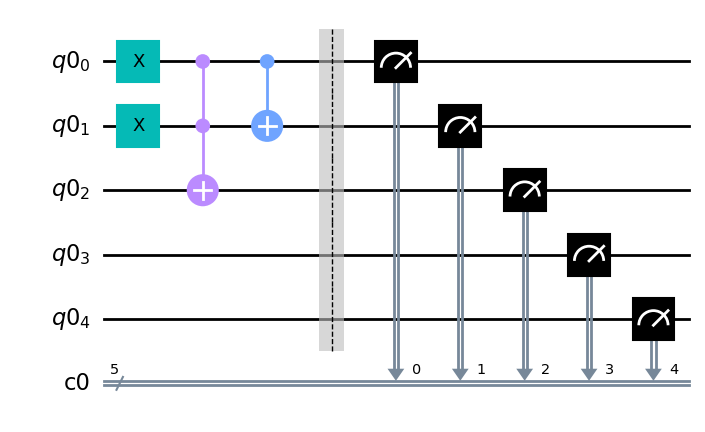

In [12]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)

qc = QuantumCircuit(qr, cr)
qc.x(qr[0])
qc.x(qr[1])
qc.ccx(qr[0], qr[1], qr[2])
qc.cx(qr[0], qr[1])
qc.barrier()
qc.measure(qr, cr)
qc.draw("mpl")

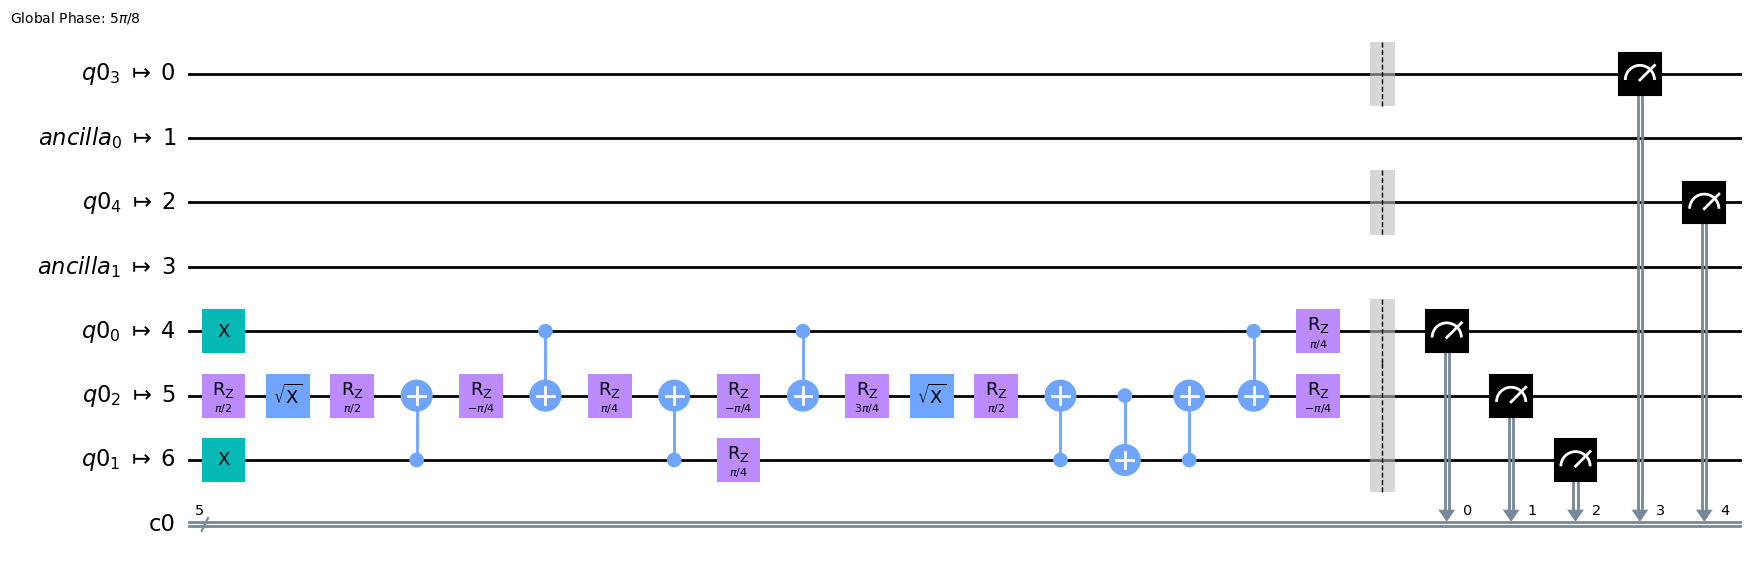

In [13]:
mapped_circuit = transpile(qc, lagos_backend)
mapped_circuit.draw("mpl", fold = -1)

In [14]:
result = execute(mapped_circuit, lagos_backend, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

IBMBackendApiError: ignored

### Result comparison to QASM simulator

In [15]:
aer_backend = Aer.get_backend("qasm_simulator")

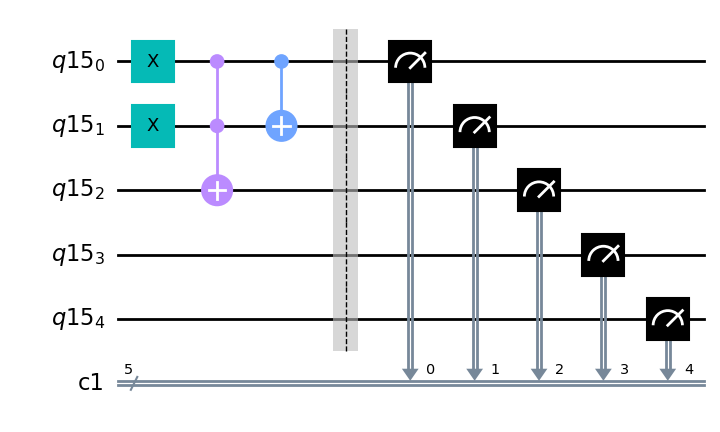

In [16]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)

qc = QuantumCircuit(qr, cr)
qc.x(qr[0])
qc.x(qr[1])
qc.ccx(qr[0], qr[1], qr[2])
qc.cx(qr[0], qr[1])
qc.barrier()
qc.measure(qr, cr)
qc.draw("mpl")

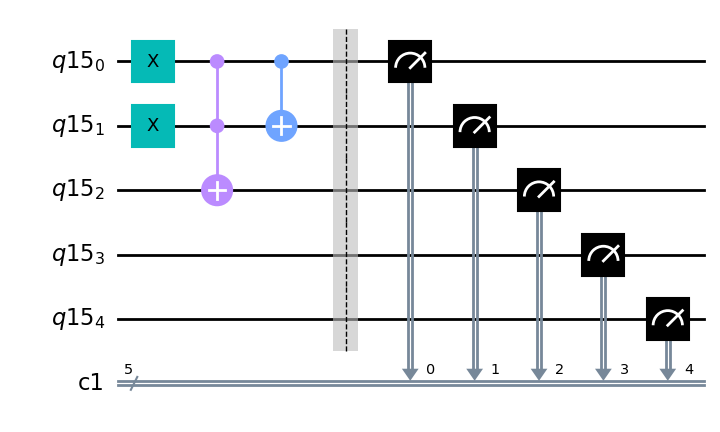

In [17]:
mapped_circuit = transpile(qc, aer_backend)
mapped_circuit.draw("mpl", fold = -1)

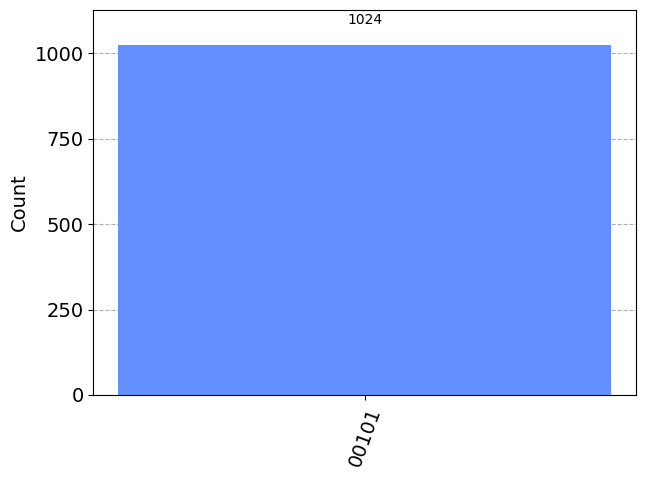

In [18]:
result = execute(mapped_circuit, aer_backend, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)